# 군집분석이란

1. 군집분석이란
   - 서로 유사한 정도에 따라 다수의 객체를 군집으로 나누는 작업 또는 이에 기반한 분석을 의미한다.
   - 유사도가 높은 데이터까리 그룹화(대표적으로 유클리드 거리계산식을 이용)
   - 계층형 클러스터링과 비계층형 클러스터링으로 분류
   - 주요 알고리즘 : k-means, hierarchical 등 
<br>


2. 군집분석의 특징
   - 종속변수(y)가 없는 데이터 마이닝 기법(비지도 학습)
   - 유클리드 거리 기반 유사 객체 묵음(유사성 = 유클리드 거리)
   - 전체적인 데이터 구조를 파악하는데 이용
   - 분석 결과에 대한 가설 검정 없음(타당성 검증 방법 없음)
   - 계층적 군집분석(탐색적), 비계층적 군집분석(확인적)
<br>


3. 계층적 군집분석(hierarchical)
   - 유클리드 거리를 이용한 군집분석 방법
   - 계층적으로 군집 결과 도출
   - 탐색적 군집분석
   - 계층적 군집분석의 결과 : 덴드로그램(Dendrognram) - 표본들이 군을 형성하여 과능얼 거처 나무형식의 그림
   - 군집 수는 사용자가 정할 수 있다.
   
   
<br>
4. 비계층적 군집분석(k-means)
   - 계층적 군집분석보다 속도 빠름<br>
   - 군집의 수를 알고 있는 경우 이용<br>
   - k는 미리 정하는 군집수<br>
   - 확인적 군집분석<br>
   - 계층적 군집화의 결과에 의거하여 군집 수 결정<br>
   - 변수보다 관측대상 군집화에 많이 이용<br>
   - 군집의 중심(cluster center)은 사용자가 정함<br>
<br>


5. k-means 군집분석 알고리즘
   1) k값을 초기값으로 k개의 centroid 선정(란덤)<br>
   2) 각 데이터 포인터를 가장 가까운 centroid에 활당<br>
   3) centroid에 활당된 모든 데이터 포인터의 중심 위치 계산(centr 재조정)<br>
   4) 재조정된 centroid와 가장 가까운 데이터 포인트 활동<br>
   5) centroid 재중정이 발생되지 않을 떄까지3),4) 단계반복<br>


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from warnings import filterwarnings
import warnings

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import warnings
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

# 한글 폰트 설정
mpl.rc('font', family='malgun gothic')

# 시각화 차트에 음수설정
mpl.rc('axes', unicode_minus = False)

# 오류경고
warnings.filterwarnings('ignore')



import seaborn as sns

# 차트 스타일지정     글꼴                    음수처리                        눈금
sns.set(font = 'malgun ghthic', rc={'axes.unicode_minus':False}, style = 'darkgrid')
plt.rc('figure', figsize=(10, 8))

# hierachical_계층적 군집분석
  - 유클리드 거리계산식 이용

In [28]:
from sklearn.datasets import load_iris

#계층적 군집분석 함수
from scipy.cluster.hierarchy import linkage, dendrogram

In [29]:
# features_names
iris = load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [49]:
cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

#iris = load_iris(return_X_y = True)


iris_df = pd.DataFrame(iris.data, columns = cols)
iris_df['labels'] = iris.target
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 게층적 군집분석

In [50]:
# 계층적군집분석의 연결방식 : 단순연결(single), 완전연결(complete), 평균연결방싱(average)
cluster = linkage(y= iris_df , method='complete', metric = 'euclidean')
#                  DataFrame         연결방식            거리계산방법   

cluster.shape

(149, 4)

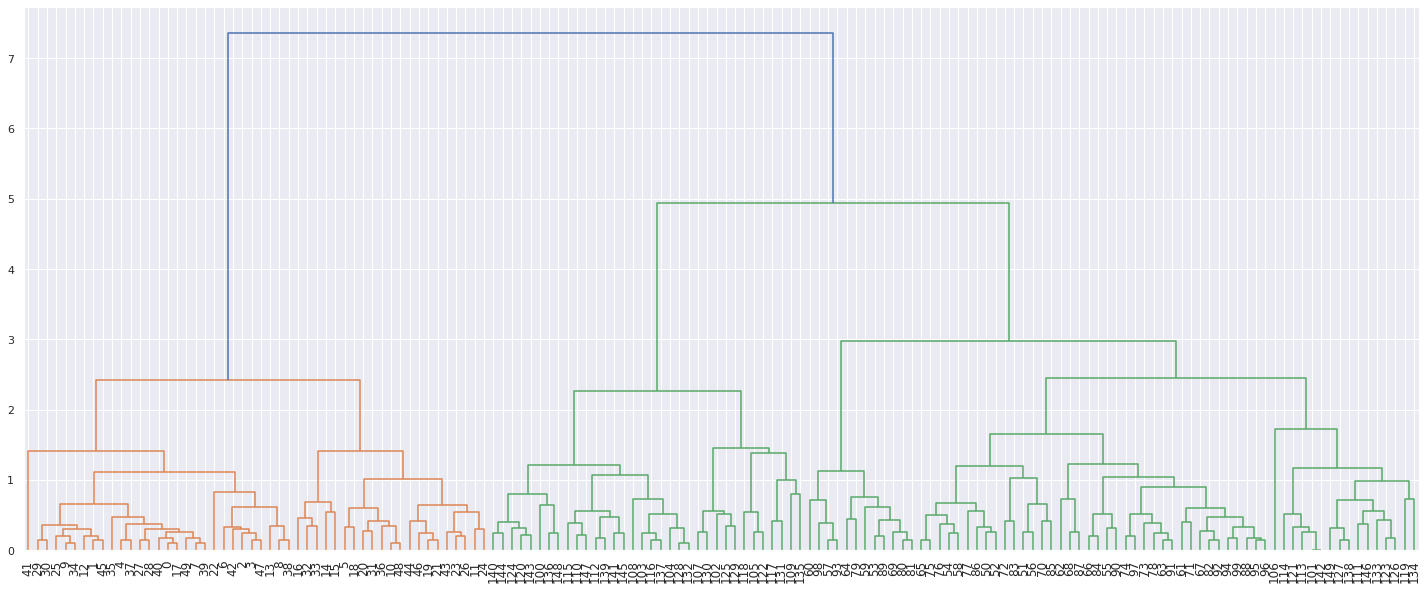

In [51]:
# 군집수 :  결정 : 덴드로그램 시각화
plt.figure(figsize=(25,10))

dendrogram(cluster, leaf_rotation = 90, leaf_font_size = 12)
#                       글자각도             글자사이즈

plt.show()

In [52]:
# 클리스터링 결과
from scipy.cluster.hierarchy import fcluster # 지정한 클러스터의 수로 자르는 함수

cut_tree = fcluster(cluster,  t = 3,   criterion = 'distance')
#                            자를 것        자를 기준

# prediction
cut_tree

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 3, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2,
       2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3], dtype=int32)

In [53]:
labels = iris_df['labels'] #정답

df = pd.DataFrame({'pred':cut_tree, 'labels':labels})
df

,pred,labels
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
145,2,2
146,3,2
147,2,2
148,2,2


In [54]:
con_mat = pd.crosstab(df['pred'], df['labels'])
con_mat

labels,0,1,2
pred,,,
1,50,0,0
2,0,0,34
3,0,50,16


In [55]:
# iris_df에 군집 예측치를 추가
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [58]:
iris_df['cluster'] = cut_tree
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,labels,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


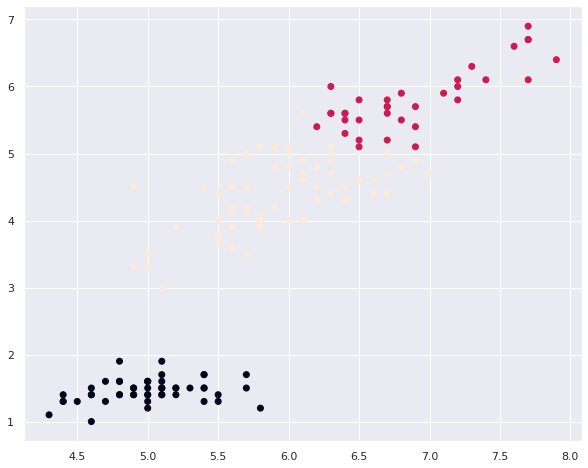

In [60]:
# 클러스터로 분리된 값 산점도 시각화
plt.scatter(x=iris_df['sepal_length'], y=iris_df['petal_length'], c=iris_df['cluster'])

In [62]:
# 클러스터 빈도수
iris_df['cluster'].value_counts()

3    66
1    50
2    34
Name: cluster, dtype: int64

In [69]:
# 각 클러스터별 통계

cluster_g = iris_df.groupby('cluster').mean()
cluster_g

,sepal_length,sepal_width,petal_length,petal_width,labels
cluster,,,,,
1,5.006000,3.428000,1.462000,0.246000,0.000000
2,6.888235,3.100000,5.805882,2.123529,2.000000
3,5.939394,2.754545,4.442424,1.445455,1.242424


# k-means : 비계층적 군집분석

In [76]:
# target 을 제회한 feature를 이용해서 데이터 프래임을 생성
cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

iris_df = pd.DataFrame(iris.data, columns = cols)
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [81]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(iris_df)

# 학습후 나온 값
kmeans.labels_

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [85]:
iris_df['target'] = iris.target
iris_df['cluster'] = kmeans.labels_

iris_result = iris_df.groupby(['target','cluster']).size()
iris_result

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
dtype: int64

In [90]:
from sklearn.decomposition import PCA

# PCA 차원축소
pca = PCA(n_components = 2)
pca_transformed = pca.fit_transform(iris.data)
iris_df['pca_x'] = pca_transformed[:, 0]
iris_df['pca_y'] = pca_transformed[:, 1]

iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,1,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,1,-2.728717,0.326755


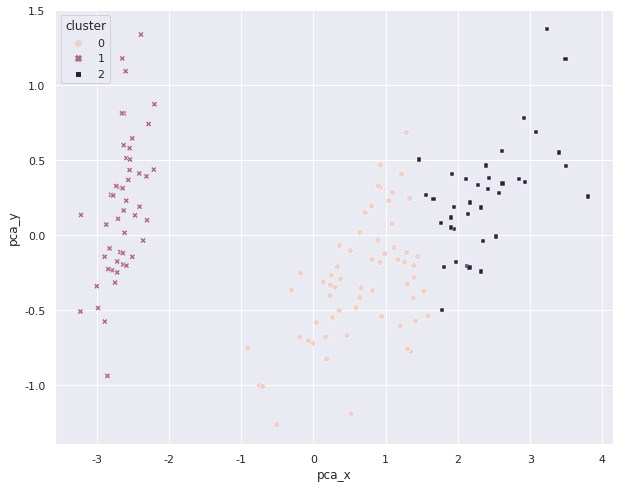

In [92]:
sns.scatterplot(x='pca_x', y ='pca_y', data = iris_df, hue='cluster', style='cluster')
plt.show()

In [96]:
# 클러스터링 결과
pred = kmeans.predict(iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [98]:
len(pred)

150

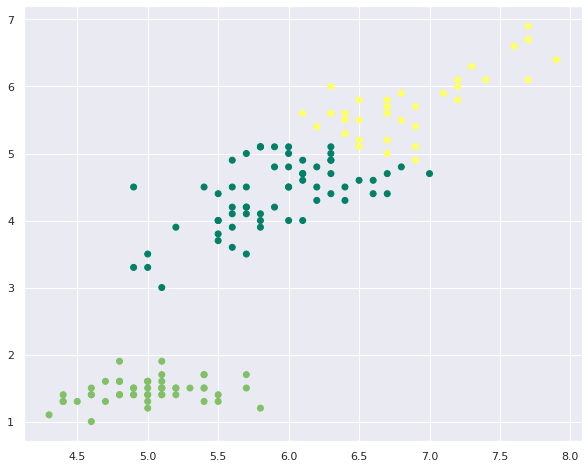

In [106]:
# 군집결과 시각화
plt.scatter(x=iris_df['sepal_length'], y=iris_df['petal_length'], c=pred, cmap='summer')
plt.show()

In [108]:
# 군집별 중앙값
#            중앙값
centers = kmeans.cluster_centers_
centers

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

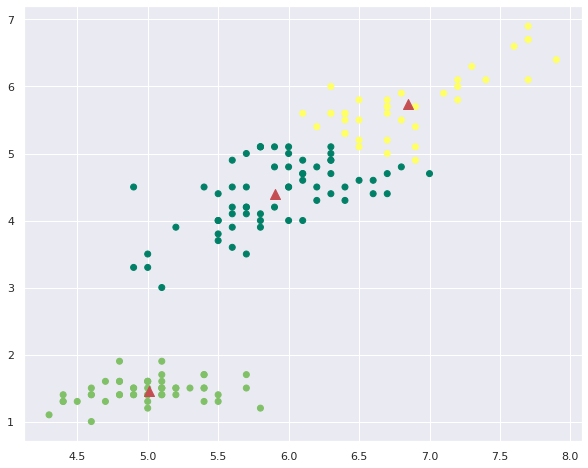

In [118]:
# 군집별 중앙값 시각화
plt.scatter(x=iris_df['sepal_length'], y=iris_df['petal_length'], c=pred, cmap='summer')
plt.scatter(x=centers[:,0], y=centers[:,2], marker='^', c='r', s=100)

plt.show()